In [ ]:
from google.colab import drive
drive.mount('/content/drive') #login to your google drive

Mounted at /content/drive


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
torch.autograd.set_detect_anomaly(True)
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [ ]:
#Check if GPU is available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
import os
data_set = '/content/drive/MyDrive/sarcasm detection dataset/Sarcasm_Headlines_Dataset.json'
for dirname, _, filenames in os.walk(data_set):
    for filename in filenames:
        print(os.path.join)

In [ ]:
import json

def parsed_data(file):
    for l in open(file, 'r'):
        yield json.loads(l)

dataset = list(parsed_data(data_set))
# type(dataset)

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
df = df[['headline', 'is_sarcastic']]
# print(df.shape)
df = df[:5000]
print(df.shape)

(5000, 2)


0    2813
1    2187
Name: is_sarcastic, dtype: int64


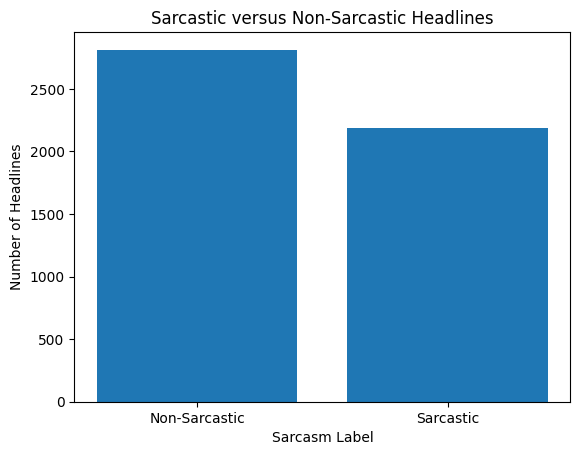

In [ ]:
n1_headlines = df['is_sarcastic'].value_counts()
print(n1_headlines)

plt.bar(n1_headlines.index, n1_headlines.values)
plt.xlabel('Sarcasm Label')
plt.ylabel('Number of Headlines')
plt.title('Sarcastic versus Non-Sarcastic Headlines')
plt.xticks(n1_headlines.index, ['Non-Sarcastic', 'Sarcastic'])
plt.show()

In [ ]:
import re

print(df['headline'])

#Changing the headlines to lower case in df dataset
df['headline'] = df['headline'].apply(lambda x: x.lower())

#Removing the non alphabtes - numerals etc. in df dataset
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

0       former versace store clerk sues over secret 'b...
1       the 'roseanne' revival catches up to our thorn...
2       mom starting to fear son's web series closest ...
3       boehner just wants wife to listen, not come up...
4       j.k. rowling wishes snape happy birthday in th...
                              ...                        
4995    learn to fix the no. 1 mistake you are making ...
4996    for the first time, chimpanzees are making a f...
4997    there's no good excuse for the racist impact o...
4998    sasha and malia obama tried (and failed) to me...
4999    queen cersei reading insults from 'the bachelo...
Name: headline, Length: 5000, dtype: object


In [ ]:
# Preprocessing step 2 - Tokenisation

#TOKENISATION

import torchtext
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english') #Defining the tokenizer

# for entry in df:
#     print(type(entry))

# I. For df

tokenized_headlines1 = [tokenizer(headline) for headline in df['headline']]
print(tokenized_headlines1)
# len(tokenized_headlines)

# print(entry for entry in df)
# tokenized_title = [tokenizer(entry['headline']) for entry in df] # Creating a list of tokenized titles
# type(tokenized_title)

# for tokens in tokenized_title:
#     print(tokens)                       #Print the tokenised title

[['former', 'versace', 'store', 'clerk', 'sues', 'over', 'secret', 'black', 'code', 'for', 'minority', 'shoppers'], ['the', 'roseanne', 'revival', 'catches', 'up', 'to', 'our', 'thorny', 'political', 'mood', 'for', 'better', 'and', 'worse'], ['mom', 'starting', 'to', 'fear', 'sons', 'web', 'series', 'closest', 'thing', 'she', 'will', 'have', 'to', 'grandchild'], ['boehner', 'just', 'wants', 'wife', 'to', 'listen', 'not', 'come', 'up', 'with', 'alternative', 'debtreduction', 'ideas'], ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'in', 'the', 'most', 'magical', 'way'], ['advancing', 'the', 'worlds', 'women'], ['the', 'fascinating', 'case', 'for', 'eating', 'labgrown', 'meat'], ['this', 'ceo', 'will', 'send', 'your', 'kids', 'to', 'school', 'if', 'you', 'work', 'for', 'his', 'company'], ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'], ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'for', 'the', 'ages'], ['airline', 'passengers', 'tackl

In [ ]:
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

all_tokens = [token for sentence in tokenized_headlines1 for token in sentence] # It is list comprehension. It is a flattened list of all the tokens
# print(all_tokens)
vocab = list(set(all_tokens)) #Removing the duplicate words. Only the unique words are kept in the list
dictionary = {token: i for i, token in enumerate(vocab)} # Create a dictionary where the token is the key and its index is the value - each word is mapped to its index
# print(len(vocab))
# print(dictionary['clerk'])

#Word Embeddings : converting the tokenized_headlines into numerical representations
embedding_dim = 10 # means each word will be represented by a dense vector of size 10
embedding_layer = nn.Embedding(len(dictionary), embedding_dim) # Creating an embedded layer which maps the word-indexes to 10-dimensional dense vectors
# print(embedding_layer)


# Convert tokens to their corresponding numerical representation, Assuming you already have "dictionary" and "all_tokens" defined
# numerical_sequences = [dictionary[token] for token in all_tokens if token in dictionary]
# print(len(numerical_sequences))
# numerical_sequences1 = [[dictionary[token] for token in sentence if token in dictionary] for sentence in all_tokens]
# # print(len(numerical_sequences1))
numerical_sequences2 = [[dictionary[token] for token in sentence if token in dictionary] for sentence in tokenized_headlines1]
# print(numerical_sequences2)
# print(len(numerical_sequences2))
# print(numerical_sequences2[0])

In [ ]:
def pad_input(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len), dtype = int)
    for ii, review in enumerate(sentences):
      if len(review) != 0:
          features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

seq_len = 30

embedded_sequences = pad_input(numerical_sequences2, seq_len)
print(embedded_sequences.shape)

labels = df['is_sarcastic'].values #Extracting the labels for splitting
print(labels.shape)

# print("Labels:", labels)
# print(labels.shape) #ensuring the padded sequences and the labels are of the same dimension


(5000, 30)
(5000,)


In [ ]:
from torch.utils.data import Dataset, dataloader
from sklearn.model_selection import train_test_split
import torch.optim as optim

#Splitting the df data into training (70%), and test (30%) (test_size = 0.3) sets
# 42 ensures the same train and test data in every epoch
train_sequences, test_sequences, train_labels, test_labels = train_test_split(embedded_sequences, labels, test_size = 0.3, random_state = 42)

#Splitting the test data (30%) into validation (10%) and test (20%) sets #2/3 for test set = 66%
val_sequences, test_sequences, val_labels, test_labels = train_test_split(test_sequences, test_labels, test_size = 0.66 , random_state = 42)

# Define batch size - the no. of datapoints (samples) processed by the model in each training iteration
batch_size = 2

#To create 3 separate datasets, we need to define a class named CustomDataset
from torch.utils.data import TensorDataset, Dataset

class TensorDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        return sequence, label

# Create 3 datasets for easy access during training and evaluation
train_dataset = TensorDataset(train_sequences, train_labels)
val_dataset = TensorDataset(val_sequences, val_labels)
test_dataset = TensorDataset(test_sequences, test_labels)

# Create data loaders - loading the data into the LSTM model in batches to improve efficiency (memory & computational) #too difficult to handle the entire data at once
train_data_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size = batch_size)
test_data_loader = DataLoader(test_dataset, batch_size = 1)

In [ ]:
# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.

# Inform the user if the notebook uses GPU or CPU.

def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
class SentimentNet(nn.Module): #defining a new class "SentimentNet" which is a subclass of the class "nn.Module"
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, num_layers, drop_prob=0.5):  #setting up the neural network architecture by defining its layers and parameters
        super(SentimentNet, self).__init__()                      # initializing the class "SentimentNet"
        self.output_size = output_size                            #The 'output_size' will be stored as a variable 'self.output_size' and will be used later during the forward pass to determine the size of the output layer
        self.num_layers = num_layers                              #no of hidden layers in the LSTM
        self.hidden_dim = hidden_dim                              #size of the hidden state (h(t-1))/Short-term memory in the LSTM
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # creating an instance of "nn.Embedding" which is an Embedding layer - converts the tokens in vocab_size into dense vectors of size "embedding_dim"
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, dropout=drop_prob, batch_first=True)   # 'dropout' - dropout probability for regularisation; batch_first = True : The input data has the batch dimension as the first dimension
        self.dropout = nn.Dropout(drop_prob)                      #Creating a dropout layer "nn.Droput"
        self.fc = nn.Linear(hidden_dim, output_size)              #Creating a fully connected dense layer; maps the LSTM output to the final "output_size"
        self.sigmoid = nn.Sigmoid()                                #sigmoid function to squash the final output function in the range [0,1].

    def init_hidden(self, batch_size):   #initializes the hidden state of the LSTM layer
        weight = next(self.parameters()).data
        hidden = (weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.num_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

    def forward(self, x, hidden):                     #forward computation; takes two arguments - x (input data) and hidden (LSTM's initial hidden state)
        batch_size = x.size(0)                        #calculates the batch size of the input data
        x = x.long()
        embeds = self.embedding(x)        #passes the input layer through the embedding layer to convert the tokens into dense word vectors
        lstm_out, hidden = self.lstm(embeds, hidden) # it produces two outputs (1) the output of the LSTM at each time step (2) the final hidden state after processing the entire sequence
        # lstm_out_copy = lstm_out.clone()  # Create a copy of lstm_out
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)  #reshapes the "lstm_out" tensor to have dimensions (batch_size * sequence_length, hidden_dim); prepares the data for the fully connected layer

        out = self.dropout(lstm_out)  #applies dropout to LSTM to prevent overfitting
        out = self.fc(out)            #passes the output through the fully connected layer to produce the final prediction
        out = self.sigmoid(out)       #applies the sigmoid activation function to squash the output in the range [0,1]

        out = out.view(batch_size, -1)    # reshapes the output tensor back to its original shape with dimensions (batch_size, sequence_length)
        out = out[:,-1]
        return out, hidden

In [ ]:
#Create the LSTM or SentimentNet Model

# input_size = 10 # the input size at each time step (Eg: if 5, the input will look like [1,4,5,7,6])
hidden_size = 100 # size of the cell state and the hidden state at each time step (both are equal) # This is NOT the no of hidden layers
output_size = 1  # assuming binary classification (non-sarcastic and sarcastic)
num_layers = 2    # the number of hidden layers
embedding_dim = 10 # means each word will be represented by a dense vector of size 10
# embedding_layer = nn.Embedding(len(dictionary), embedding_dim) # Creating an embedded layer which maps the word-indexes to 10-dimensional dense vectors
# print(embedding_layer)
vocab_size = len(vocab)

#Check if GPU is available, else use CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)

# model = LSTMModel(input_size, hidden_size, output_size, num_layers)
model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_size, num_layers)
model.to(device)

lr = 0.001 #if it converges too fast -> cannot generalise
# Define the CROSS ENTROPY Loss Function and Optimization Algorithm
criterion = nn.CrossEntropyLoss()
# criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# for param in model.parameters():
#      param.requires_grad = True
# Learning Rate decay (after training)

In [ ]:
# Training Loop,
torch.autograd.set_detect_anomaly(True)     #Enable Anomaly Detection

epochs = 30
counter = 0
print_every = 1000
clip = 5
valid_loss_min = np.Inf
# GRADIENT_ACCUMULATION_STEPS=32
train_accuracy_list = []
val_accuracy_list = []


model.train()
for i in range(epochs):
    print(f'Epoch: {i+1}')
    h = model.init_hidden(batch_size)
    # print(h)
    # step = 0
    total_train_correct = 0
    total_val_correct = 0

    for inputs, labels in train_data_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        labels = labels.long()
        model.zero_grad()
        output, h = model(inputs, h)    # Pass the hidden state as it is to the model
        # print(f'Output: ', output, labels.float())
        loss = criterion(output, labels.float())
        # print(f'Loss: ', loss)
        loss.backward(retain_graph = False)
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        #- after fixed num of steps (prob. for a given number of mini batches), adjust lr, optimizer and zero grad.
        # if (step + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
        #     # scheduler.step() #- adjusts learning rate during training. Reducing it over time.
        #     optimizer.step() #- adam optimizer
        #     model.zero_grad() #- zero gradient
        # step = step + 1



        if counter%print_every == 0:
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inp, lab in val_data_loader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out, lab.float())
                val_losses.append(val_loss.item())


                # Calculate validation accuracy
                pred_val = torch.round(out.squeeze())  # Rounds the output to 0/1
                correct_val_tensor = pred_val.eq(lab.float().view_as(pred_val))
                total_val_correct += correct_val_tensor.sum().item()

            model.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

            # Calculate and store epoch-wise accuracy
            train_accuracy = total_train_correct / len(train_data_loader.dataset)
            val_accuracy = total_val_correct / len(val_data_loader.dataset)
            train_accuracy_list.append(train_accuracy)
            val_accuracy_list.append(val_accuracy)

            if np.mean(val_losses) <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

            # Print train and validation accuracy
            print("Train accuracy: {:.3f}%".format(train_accuracy_list[-1] * 100))
            print("Validation accuracy: {:.3f}%".format(val_accuracy_list[-1] * 100))


torch.autograd.set_detect_anomaly(False)    #Disable Anomaly Detection

Epoch: 1
Epoch: 1/30... Step: 1000... Loss: 0.702246... Val Loss: 0.589865
Validation loss decreased (inf --> 0.589865).  Saving model ...
Train accuracy: 0.000%
Validation accuracy: 57.451%
Epoch: 2
Epoch: 2/30... Step: 2000... Loss: 0.683423... Val Loss: 0.589859
Validation loss decreased (0.589865 --> 0.589859).  Saving model ...
Train accuracy: 0.000%
Validation accuracy: 57.451%
Epoch: 2/30... Step: 3000... Loss: 0.683797... Val Loss: 0.589858
Validation loss decreased (0.589859 --> 0.589858).  Saving model ...
Train accuracy: 0.000%
Validation accuracy: 114.902%
Epoch: 3
Epoch: 3/30... Step: 4000... Loss: -0.000000... Val Loss: 0.589859
Train accuracy: 0.000%
Validation accuracy: 57.451%
Epoch: 3/30... Step: 5000... Loss: 0.693109... Val Loss: 0.589857
Validation loss decreased (0.589858 --> 0.589857).  Saving model ...
Train accuracy: 0.000%
Validation accuracy: 114.902%
Epoch: 4
Epoch: 4/30... Step: 6000... Loss: 0.716713... Val Loss: 0.589894
Train accuracy: 0.000%
Validation 

In [ ]:
import torch
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

model.load_state_dict(torch.load('./state_dict.pt'))  # Loading a pre-trained model
print(model)

test_losses = []
num_correct = 0
h = model.init_hidden(1)  # batch_size = 1

model.eval()
predictions = []
ground_truth = []  # Initialize empty lists for predictions and ground truth

for inputs, labels in test_data_loader:
    h = tuple([each.data for each in h])
    inputs, labels = inputs.to(device), labels.to(device)
    output, h = model(inputs, h)
    test_loss = criterion(output, labels.float())
    test_losses.append(test_loss.item())

    pred = torch.round(output)  # Rounds the output to 0/1
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

    predictions.extend(pred.detach().cpu().numpy())
    ground_truth.extend(labels.cpu().numpy())

# Calculate evaluation metrics after the loop
predictions = np.array(predictions)
ground_truth = np.array(ground_truth)

f1 = f1_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions)
recall = recall_score(ground_truth, predictions)

print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct / len(test_data_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc * 100))

print("F1 score: {:.3f}".format(f1))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))


SentimentNet(
  (embedding): Embedding(11665, 10)
  (lstm): LSTM(10, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Test loss: 0.000
Test accuracy: 70.101%
F1 score: 0.702
Precision: 0.629
Recall: 0.793
